1. Creational - How objects are created
2. Structrual - How classes/objects are composed
3. Behavioral - How objects interact

# Creational Deign Patterns
- Focus on the process of object creation or problems related to object creation. they help in making a system independent of how its objects are created, composed, and represented.
- Lots of flexibility in what gets created, who creates it, and how it gets created.
- 2 main themes in these patterns:
    1. They keep information about the specific classes used in the system hidden.
    2. They hide the details of how instances of these classes are created and assembled.

## Types of Creational Design Patterns
- 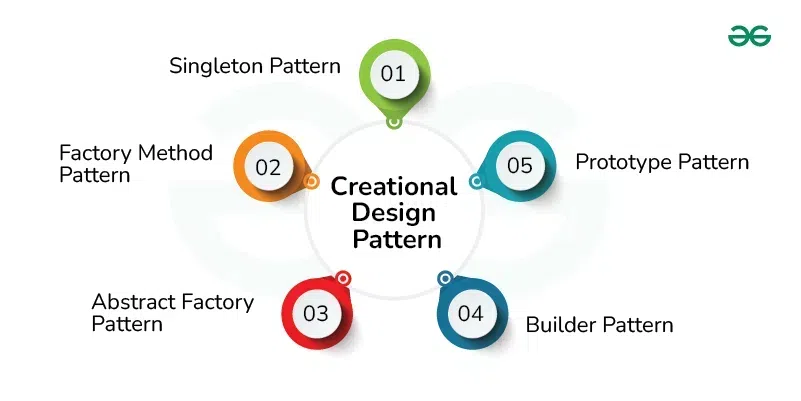
## Benefits
- They allow for greater flexibility in object creation. By decoupling the process of instantiation from the rest of the system. We can easily change the class being instantiated without affecting other components.
- These patterns encapsulate the logic of object creation, which simplifies code management and promotes cleaner, more organized code. 

- The system of efficient product creation is similar to Creational Design Patterns in software Development. These patterns are about managing how objects are created in a software system, making it easier to build and maintain.
- Instead of creating objects directly all over our code, creational patterns give us a smart, controlled way to handle the object creation proceess.
- These patterns allow us to create objects in a controlled and organized way.
- The creational patterns help centralize and streamline object creation, making our system more flexible and easier to maintain.

### Enter the Creational Design Pattern 
1. Singleton:
    - Think of this pattern like the factory's manager who ensures that only one person is in charge of making the most important product. The Singleton patterns makes sure there's only one instance of a class throuhout our entire system, so we don't waste resources.
2. Factory Method
    - Imagine if our factory had an assembly line that knew how to produce diffeent types of products. Instead of specifying the exact product type every time, we simply call the assembly line to handle it. The Factory Method pattern allows us to delegate the object creation process, while still allowing flexibility for the type of object created.
3. Abstract Factory
    - Picture a factory that makes multiple types of related products, like different kinds od furniture, chairs, tables and sofas. The abstract Factory pattern helps us organize the creation of these related objects byr providing an interface for each familt of objects, without worrying about the specifics.
4. Builder
    - The Builder pattern lets us break down the creation process into smaller steps, giving us more control and flexibility over the final result.
5. Prototype
    - Imagine we want to quickly copy a product that's already been made, like a prototype of a new model. The prototype pattern allows us to clone an object rather than creating it from scratch, saving both time and resources.
  
### Why should we care about these patterns
- Simplify object Creation
    - We no longer have to deal with the messay details of object creation scattered throughout our code. Everything is organized, like a well run factory.
- Flexibility
    - We can easily add new types of objects without changing our entire codebase. It's like expanding our factory prodcue new products with minimal diruption.
- Maintainability
    - If we need to change how an object is created, we can do it one place, rather than hunting down every line of code that creates the object. It makes our code cleaner and easier to update.
 
### Real-life Examples
- Database Connections
    - We might use the Singleton pattern to ensure there's only one connection to the database throughout our entire system.
- Creting UI Elements
    - If we're building a cross-platform application, the Abstract Factory pattern can help create platform-specific buttons and windows, so our app feels at home on both Windows and Mac.
- Cloning Objects
    - When we need a duplicate of an object (game development for creating copies of game characters), we might use the prototype pattern to clone the object efficiently.
 
####
- Creational Design patterns are like the smart managers in our software. They help us control how objects are created, making our code more organized, flexible, and easy to maintain. Instead of having to manually assemble each object in every corner of our application, these patterns let us streamline the process, giving us more time to focus on the real functionality of our system.

# 1. Singleton Design Pattern
- Ensures only one instanec of a class exists.
- Common in logging, DB connections, config managers.
- Creating more than one objects of these could lead to issues such as incorrect program behavior, overuse of resources, or inconsistent results. This is where singleton Design Pattern comes into play.
- Singleton Pattern is a creational design pattern that guarantees a class has only one instance and provides a global point of access to it.
- It involves only one class which is responsible for instantiating itself, making sure it creates not more than one instance.
- Additionally, we need to provide a method for external objects to acces the singleton object.
- Benifits:
    - To limit concurrent access to shared resource.
    - To create just one instance of a class, throughout the lfetime of a program.
## Class Diagram
- To implement Singleton is making the constructor private and providing a static method for external objects to acceess it.
- 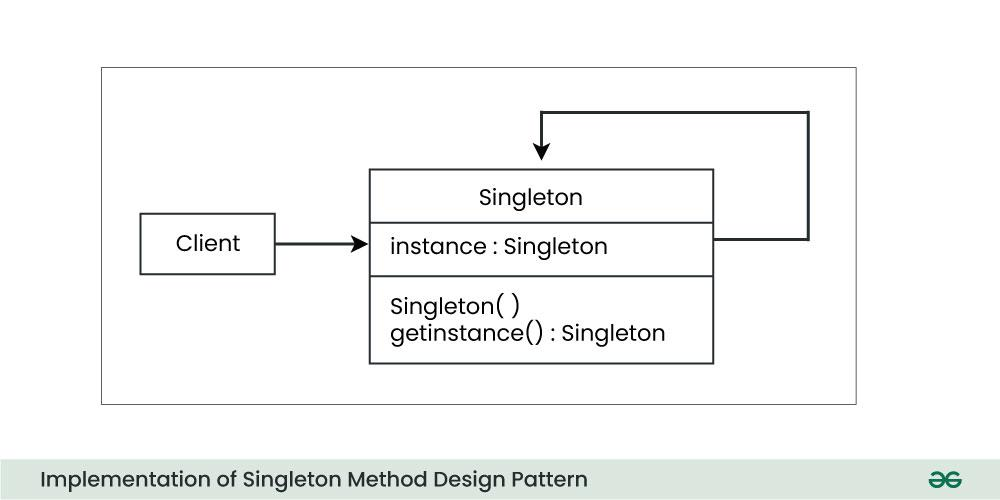
- The instance class variable holds the one and only instanec of the Singleton class.
- The Singleton() constructor is declared as private, preventing external objects from creating new instances.
- The getInstance() method is a static class method, making it accessible to the external world.

## Implementation
- There are several ways to implement the Singleton Pattern.
    1. Lazy initialization
    2. Thread-safe Singleton
    3. Double-Checked Locking
    4. Eager Initialization
    5. Bill Pugh Singleton
    6. Static Block Initialization
    7. Enum Singleton

### 1. Lazy Initilization
- This approach creates the singleton instance only when it is needed, saving resources if the singleton is never used in the application.
    1. Checks if an instance already exisits
    2. If not, it creates a new instance
    3. If an instance already exists, it skips the creation step.

In [1]:
class LazySingleton:
    _instance = None

    def __init__(self):
        if LazySingleton._instance is not None:
            raise Exception("Use get_instance() instead.")

    @staticmethod
    def get_instance():
        if LazySingleton._instance is None:
            LazySingleton._instance = LazySingleton()
        return LazySingleton._instance

### 2. Thread-Safe singleton
- This is similar to lazy initialization but also ensures that the singleton is thread-safe
- By making the getInstance() method synchronized ensuring only one thread can execute this method at a time.
- When a thread enters the synchronized method, it acquires a lock on the class object. Other treads must wait until the method is executed.

In [4]:
import threading
class ThreadSafeSingleton:
    _instance = None
    _lock = threading.Lock()


    def __init__(self):
        if ThreadSafeSingleton._instance is not None:
            raise Exception("Use get_instance() instead")

    @staticmethod
    def get_instance():
        with ThreadSafeSingleton._lock:
            if ThreadSafeSingleton._instance is None:
                ThreadSafeSingleton._instance = ThreadSafeSingleton()
        return ThreadSafeSingleton._instance

### 3. Double-Checked Locking
- This approach minimized performance overhead from synchronized by only synchronizing when the object is first created.
- It used the volatile keywaord to ensure that changes to the instance variable are immediately visible to other threads.

In [5]:
import threading

class DoubleCheckedSingleton:
    _instance = None
    _lock = threading.Lock()

    def __init__(self):
        if DoubleCheckedSingleton._instance is not None:
            raise Exception("Use get_instance() instead.")

    def get_instance():
        if DoubleCheckedSingleton._instance is None:
            with DoubleCheckedSingleton._lock:
                if DoubleCheckedSingleton._instance is None:
                    DoubleCheckedSingleton._instance = DoubleCheckedSingleton()
        return DoubleCheckedSingleton._instance

### 4. Eager Initialization
- We reply on the JVM to create the singleton instance when the class is loaded. The JVM guarantees that the instance will be created before any thread access the instance variable.
- Inherently thread-safe without needing explicit synchronization.

### 5. Bill Pugh singleton
- Uses a static inner helper class to hold the singleton instance. The inner class is not loaded into memory until it's referenced for the first time in the getInstance() method.

In [6]:
class BillPughSingleton:
    class _Helper:
        _instance = None

    def __init__(self):
        if BillPughSingleton._Helper._instance is not None:
            raise Exception("Use get_instance() instead.")

    @staticmethod
    def get_instance(self):
        if BillPughSingleton._Helper._instance is None:
            BillPughSingleton._Helper._instance = BillPughSingleton()
        return BillPughSingleton._Helper._instance

### 6. Static Block Initialization
- Similar to Eager insitialization, but the instance is created in a static block
- Ability to handle exceptions during instance creation, which is not possible with simple eager initialization.
- The static block is executed when the class is loaded by the JVM


In [8]:
class StaticBlockSingleton:
    _instance = None

    def __init__(self):
        if StaticBlockSingleton._instance is not None:
            raise Exception("Use get_instance() instead")

    @staticmethod
    def get_instance(self):
        return StaticBlockSingleton._instance

try:
    StaticBlockSingleton._instance = StaticBlockSingleton()
except Exception as e :
    raise RuntimeError("Exception occured while creating singleton instance") from e


### Singleton Design Pattern: Ensuring Only one instance
#### The problem we need to solve
- Let's imagine we're builing a loggin system for a large application. The goal is to have one and only one instance of the logger throughout the entire application. This means
    - No matter how many classes or threads use the logger, they all refer to the same object.
    - This ensures that they are no multiple loggers created, which would waste resources.
- The log refers to the messages that the Logger object writes, helping track and monitor system events, user actions, and errors in a consistent manner across our entire application.
- For example, a Logger might log:
    - A Sucessful login: "User joh_doe" logged in successfully.
    - A failed login: "ERROR: Invalid login attemp for user 'john_doe'"
    - An Exception: "ERROR: NullPointerEXception at line 42 in UserService."
- Now, we might think, "Why not just create a new logger everytime I need it?" Here's the issue: Creating multiple instances of the logger could cause issues with memory usage, or even worse, inconsistent logging if multiple loggers are trying to write to the log at the same time.
- By having a single instance of the Logger, we ensure that all parts of our application write these log entries to the same location (a file, database, or console), making it easier to monitor and debug the system.
- This is where the Singleton Design Pattern comes in, it allows us to create only one instance of a class and ensures that all parts of our application use the same instance. One logger instance ensures that all logs go the same place and are witten in the same format, making our logs more useful and easier to manage.
- We start by creating a simple logger class. The idea is that the Logger will handle writing messages to the console or a log file.

In [1]:
class Logger:
    def log(message: str):
        print(f"Log: {message}")

- It looks simple enough. Now, we need to use this logger in our application to keep track of important events. So, we go ahead and create a new Logger instance every time we need it.
- In the application class, we create a new instance of the Logger and use it to log a message

In [2]:
class Application:
    def run(self):
        logger = Logger() # New instance created everytime
        logger.log("Application started.")

#### The problem: Multiple instances of the Logger
- This approach seems to work fine at first. However, let's stop and think for a second: What's happening here every time we call the run() method?
- Each time the run() method is executed, a new Logger instance is created. This means that the application is constantly creating new instances of the logger, even though all these loggers are supposed to do the same job: log messages.
- Now, imagine that we have several classes in our application that need to log messaeges. For example, we might also have a UserService class that handles user actions like logginng in:

In [3]:
class UserService:
    def login(self, username):
        logger = Logger()
        logger.log(f"User {username} loged in.")

- In the userService class, we're creating a new logger instance everytime a user logs in. So, now we have 2 loggers running in our application, one in application and one in UserService.

### Interviewer's Question: Can we improve this
- Questions"
    - What if we want to make sure only one instance of Logger exists across the entire application?
    - How can we avoid creating multiple instances of Logger?
    - Is this the most efficient way to handle the logging system?

- The code is creating a new Logger obejct every time, which is inefficient. We need to ensure that only one instance of the logger exists, no matetr how many times we reference it.

### The Problem with Traditional Approach: Messy and Inefficient
- The issue with this approach is that every part of the application (like Application, UserService, etc) creates a new instance of the Logger class when they need to log something. This creates several problems
    1. Multiple instance of Logger
        - Each logger might try to access and write to the file at the same time, leading to potential conflicts or overhead.
    2. Inconsistent logging
        - With multiple, we might end up with log messages spread across different log files or inconsistent output in the same log file, as each instance of the Logger might manage its own logging output. This makes debugging and monitoring harder.
    3. Difficulty Managing state
        - If the logger has state-related data (e.g., which log file it writes to, configuration settings, etc), creating multiple instances means that each logger could have a different state. This wouldc ause inconsistency in how logs are managed and stored.
- If we wanted to make sure there was only one logger, we would have to check for the existence of an existing instance of the Logger each time we want to use it, and that would make the code ugly and complex. We'd end up with a lot of extra code to track and manage the instance.

In [4]:
class Logger:
    __logger: Logger = None
    def __init__(self):
        pass

    def getLogger(self):
        if self.__logger == None:
            self.__logger = Logger()
        return self.__logger

    def log(self, message):
        print(f"Log: {message}")

class Application:
    def run(self):
        logger = Logger.getLogger() # Always fetch the same instance
        logger.log("Application started.")

### Enter our Savior: The Singleton Design Pattern
- The singleton pattern ensures that a class has only one instance and provides a global point of access to that instance.
- It ensures that a class has only one instance through the entire system, and it provides a global point of access to that instance.
- The pattern guarantees that there is only one object of that class at any given time.
- If focuses on creating a single, unique instance that is shared across the entire application, making it efficeitn and manageable.
- Singleton works:
    1. We make the constructor private, so no one can directly instantitate the class.
    2. We create a static instance of the class inside the class itself.
- We provide a public static method (getInstance()) to return the single instance of the class.
- 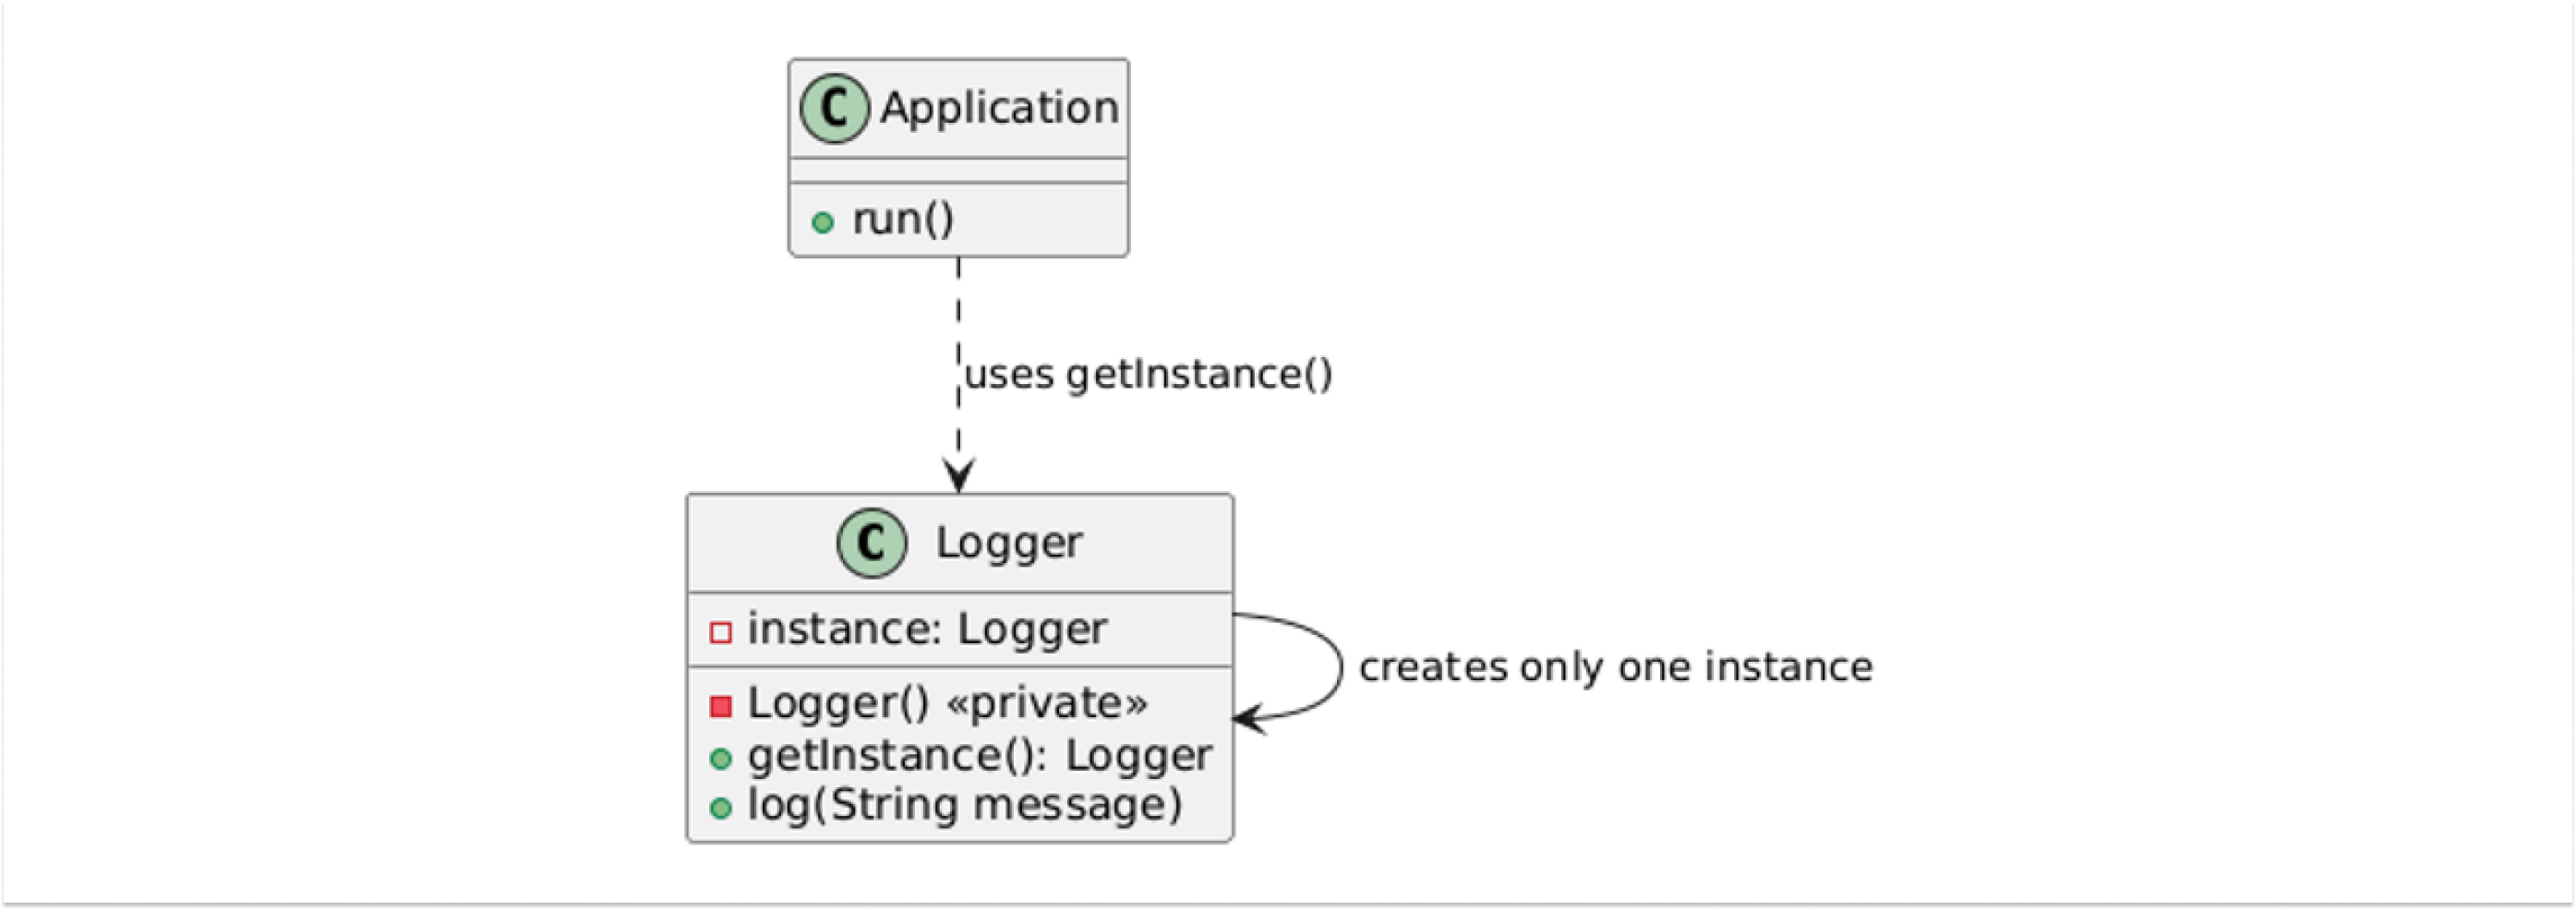

### Solving the Follow-up Questions using Singleton
- Now that we've applied the Singleton pattern, let's see how we can address the interviewer's follow-up questions:
    - What if we want only one Logger instance?
        - With the singleton pattern, there will always be only one instance of the Logger class, no matter how many time we call getInstance().
    - How can we avoid creating multiple instances of Logger
        - The Singleton ensures that only one instance is created, and subsequent calls to getInstance() return the same instance.
    - Is this the most efficient way to handle logging?
        - Yes, this is a very efficient way because it ensures we're not repeatedly creating new instancees, which would waste memory and resources.
     
### Real-life use cases
1. Logging system:
    - logging system oftene use Singleton to ensure that there's only one logger instance, ensuring consistent logging througout an application.
2. Database Conenctions
    - We often need a single database connection throughout the application to avoid multiple connections that could lead to inefficiency or resource exhaustion.
3. Configuration Settings:
    - Imagine having configuration settings for your application that need to be consistent across the app. Using a Singleton pattern ensures that only one instance of the settings object exists.
4. Thread Pooling:
    - A thread pool manager can also use a Singleton to ensure that the pool is managed efficiently with only one thread pool instance.

## Usage of Singleton in Multithreading
- Imagine we're working on an applicationn that has multiple parts, each running on differen threads (like a multi-tasking kitchen with different chefs preparing different dishes at the same time). Now, let's say one of thoose parts needs to access a Logger to write some logs. We've already applied the Singleton Design Pattern to ensure that only one instance of the Logger class exists, which is great!
- But here's where the multithreading magic happens: Since muliple parts of the application might be running at the same time, mutiple threads might try to access and create the Singleton instance of the Logger simultaneously.

### Problem in multithreading: The chaos of multiple instances
- Imagine this:
    - Thread A checks if the Logger instance is null (it is, because no instance has been created yet)
    - Thread B does the same thing at the same time, not knowing that Thread A is also trying to create the Logger instance.
- Both threads decide to create a new instance of the Logger, and suddently we have 2 instances of the Logger, which totally breaks the Singleton pattern.
- This problem is especially common in multithreaded environments where multiple parts of the program are running simultaneously, trying to acess shared resources.

#### Why is this a problem:
- Multiple instances: Now we have more than one Logger when we only wanted one, leading to inefficiency and possible issue with logging output
- Race conditions: This also introduces race conditions, where teh threads are competing to create the instance, leading to unpredictable behavior.

### Solution: Making Singleton Thread-Safe
- Now, we need to fix this problem so that no matter how many threads try to access the Logger at the same time, only one instance gets created.
- The solution is to make this Singleton instance creation process thread-safe.
    - Using Synchronized Blocks
        - We can use synchronization to ensure that only one thread can create the Logger instance at a time. The synchronized keyword is used to control access to critical sections of code, making sure that only one thread can execute a block of code at any given time.

In [5]:
import threading

class Logger:
    _instance = None
    _lock = threading.Lock() # Lock for thread-safe access

    def __init__(self):
        pass

    @classmethod
    def get_instance(cls):
        with cls._lock:
            if cls._instance is None:
                cls._instance = Logger()
        return cls._instance

    def log(self, message):
        print(f"Log: {message}")

### what's diffent here
- The volatile keyword ensures that when one thread updates the instance, it's visible to all other threads. This prevents any threads from getting an outdated version of the Logger object.
- We only use the synchronized block once - when the instance is null and needs to be created.

### How it works:
1. First check: The getInstance() method 1st checks if the instance is already created. If it is, no synchronization is needed, and the method immediately returns the exisiting instance.
2. Second check (Inside Synchronized Block): If the instance is still null, we enter the synchronized block, ensuring that only one thead can create the instance.
3. Efficient Access: Once the instance is created, other threads can access it without needing to wait. This makes the Singleton thread-safe without the performance cost of synchronizing on every call to getInstance().

### Summary: 
- By using double checked Locking
    - Only one instance of the Logger is created, even in a multithreaded environment
    - Threads don't block each other unnecessarily after the instance is created, which keeps the application efficient.
    - The use of volatile ensures that changes to the instance are visible across all threads.
- By using private constructor and a static method to access the instance, the Singleton pattern simplifies resources management, particularly for things like logging, database connections, and configuration management.
- In a multithread environment, we can make the Singleton thread safe by using Double-checked Locking and the volatile keyword, ensuring that only one instance is created even when multiple threads are involved.

# 2. Factory Method Design Pattern
- Defines an interface for creating objects, but let subclasses decide the object type.
- Used in frameworks where type may vary (e.g. payment processors)
- Provides an interface for creating objects in a superclass, but allows subclassees to alter the type of objects that will be created.
- It's useful in situations where:
    - The exact type of object to be created isn't know until runtime.
    - Object creation logic is complex, repetitivve or needs encapsulation.
    - We want to follow th Open/Closed Principle, open for execution, closed for modification.
- The design pattern that defines an interface for creating objects but let subclasses decide which object to instantiate. Promotes loose coupling by delegating object creation to a method, making the system more flexible and extensible.
- Subclassses override the factory method to produce specific object types.
- Supports easy addition of new product types without modifying exisitng code.
- 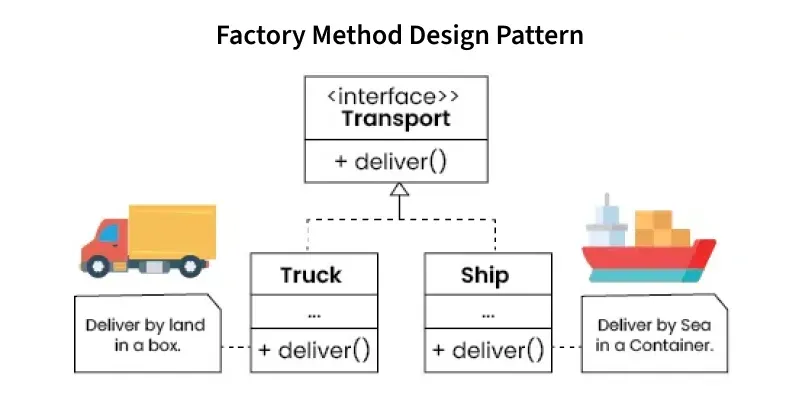


In [16]:
# Without Factory Method

from abc import ABC, abstractmethod

# Library classes
class Vehicle(ABC):
    @abstractmethod
    def printVehicle(self):
        pass

class TwoWheeler(Vehicle):
    def printVehicle(self):
        print("I am 2 wheeler")

class FourWheeler(Vehicle):
    def printVehicle(self):
        print("I am 4 wheeler")

# Client or user class
class Client:
    def __init__(self, type):
        if type == 1:
            self.pVehicle = TwoWheeler()
        elif type == 2:
            self.pVehicle = FourWheeler()
        else:
            self.pVehicle = None

    def cleanup(self):
        if self.pVehicle is not None:
            self.pVehicle = None
            
    def getVehicle(self):
        return self.pVehicle
        
def main():
    pClient = Client(1)
    pVehicle = pClient.getVehicle()
    if pVehicle is not None:
        pVehicle.printVehicle()
    pClient.cleanup()

if __name__ == "__main__":
    main()


I am 2 wheeler



Issues:
- Client depends directly on product classes.
- Client handles both product creation and usage.
- Hard to extend: Adding a new vehicle requires modifying the client.

Solution:
Factory Interface: Create an interface, VehicleFactory, with a method to produce vehicles.
- Implement casses like TwoWheelerFactoyr and FourWheelerFactory that follow the VehicleFactory interface, providing methods for vehicle type


With Factory Method Design Pattern
- 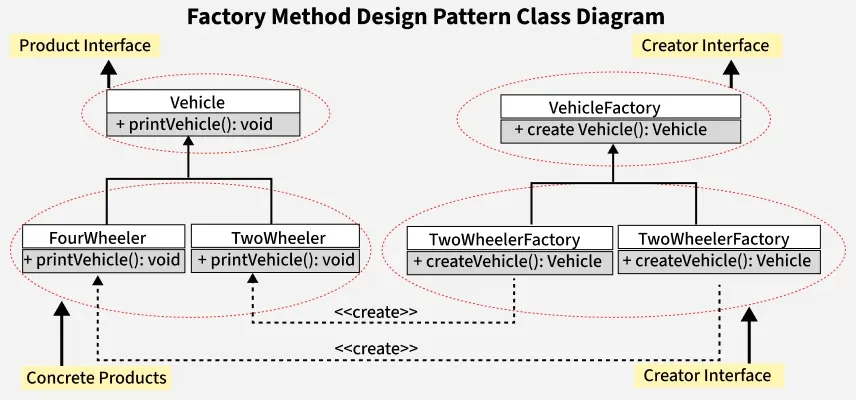

In [24]:
from abc import ABC, abstractmethod

# Product Interface
class Vehicle(ABC):
    @abstractmethod
    def printVehicle(self):
        pass

# ConcreteProductA
class TwoWheeler(Vehicle):
    def printVehicle(self):
        print("I am two wheeler")
# ConcreteProductB
class FourWheeler(Vehicle):
    def printVehicle(self):
        print("I am four wheeler")


# Creator Interface
class VehicleFactory(ABC):
    @abstractmethod
    def createVehicle(self):
        pass

# Concrete Factory for TwoWheeler
class TwoWheelerFactory(VehicleFactory):
    def createVehicle(self):
        return TwoWheeler()

# Concrete Factory for FourWheeler
class FourWheelerFactory(VehicleFactory):
    def createVehicle(self):
        return FourWheeler()

# Client class
class Client:
    def __init__(self, factory: VehicleFactory):
        self.pVehicle = factory.createVehicle()

    def getVehicle(self):
        return self.pVehicle

def main():
    twoWheelerFactory = TwoWheelerFactory()
    twoWheelerClient = Client(twoWheelerFactory)
    twoWheeler = twoWheelerClient.getVehicle()
    twoWheeler.printVehicle()

    fourWheelerFactory = FourWheelerFactory()
    fourWheelerClient = Client(fourWheelerFactory)
    fourWheeler = fourWheelerClient.getVehicle()
    fourWheeler.printVehicle()

if __name__ == "__main__":
    main()
    

I am two wheeler
I am four wheeler


### Problem: Sending Notification
#### Without Factory

In [1]:
# Problem: Sending Notification

# 1. 
# We're only sending email notification
class EmailNotification:
    def send(self, message):
        print("Sending an Email notification....")

# to use it in out service, we create the email notification object and call the send() method.
class NotificationService:
    def send_notification(self, message):
        email = EmailNotification()
        email.send(message)

# 2. 
# But then comes a new requirement: Support SMS notifications.
# So, we add a new class and update our NotificationService class 
class EmailNotification:
    def send(self, message):
        print("Sending an Email notification....")
        
class SMSNotification:
    def send(self, message):
        print("Seding a SMS notification....")

class NotificationService:
    def send_notification(self, type, messagge):
        if type == "EMAIL":
            email = EmailNotification()
            email.send(message)
        elif type == "SMS":
            sms = SMSNotification()
            sms.send(message)


# 3.
# Them, product wants to send push notifications to mobile device.
class EmailNotification:
    def send(self, message):
        print("Sending an Email notification....")
        
class SMSNotification:
    def send(self, message):
        print("Seding a SMS notification....")

class PushNotification:
    def send(self, message):
        print("Sending push notification...")

class NotificationService:
    def send_notification(self, type, message):
        if type == "EMAIL":
            email = EmailNotification()
            email.send(message)
        elif type == "SMS":
            sms = SMSNotification()
            sms.send(message)
        elif type == "Push":
            push = PushNotification()
            push.send(message)

# 4.
# Then, marketing wants to experiement with Slack alerts. Then WhatsApp
class EmailNotification:
    def send(self, message):
        print("Sending an Email notification....")
        
class SMSNotification:
    def send(self, message):
        print("Seding a SMS notification....")

class PushNotification:
    def send(self, message):
        print("Sending push notification...")

class SlackNotification:
    def send(self, message):
        print("Seding a SMS notification....")

class WhatsAppNotification:
    def send(self, message):
        print("Sending push notification...")

class NotificationService:
    def send_notification(self, type, message):
        if type == "EMAIL":
            email = EmailNotification()
            email.send(message)
        elif type == "SMS":
            sms = SMSNotification()
            sms.send(message)
        elif type == "Push":
            push = PushNotification()
            push.send(message)
        elif type == "Slack":
            slack = SlackNotification()
            slack.send(message)
        elif type == "WhatsApp":
            whatsapp = WhatsAppNotification()
            whatsapp.send(message)

- Every time we add a new notification channel, we must modify the same core logic.
- It violates key design principales, especially Open/Closed principle. - classes should be open for extension but closed for modification.

#### Simple Factory
- Lets separate the "decision of what to create" from the logic of how to use it.
- Here's the idea:
    - We create a separate class ("factory") whose only job is to centralize and encapsulate object creation.
    - The notificaton servicie no longer needs to know which concrete class to instantiate. It simply asks the factory for the right type of notification.

In [4]:
class SimpleNotificationFactory:
    @staticmethod
    def create_notification(type):
        match type:
            case "EMAIL":
                return EmailNotification()
            case "SMS":
                return SMSNotification()
            case "PUSH":
                return PushNotification()
            case _:
                raise ValueError("Unknown type")

# All creation logic is now in one place, and our notification sending logic becomes clean, readable, and open to extension.

class NotificationService:
    def send_notification(self, type, message):
        notification = SimpleNotificationFactory.create_notification(type)
        notification.send(message)

- With this approch:
    - Our core logic becomes more focused. It only uses the notification, it doesn't construct it.
    - Adding new notification type becomess easier. We just modify the factory, not the service using it.
    - Testing and maintenance get simpler
- But, still NotificationFactory is similar to the bloated code we just refactored away from. We'e just modifying with switch.
- It's' better, but it's still not open to extension without modification.
- We need to give each type of notification its own responsibility for knowing how to create itself.

#### Factory Method
- It takes the idea of object creation and hands it off to subclasses. Instead of one central factory deciding what to create, we delegate the responsibility to spcialized classes that know exactly what they need to produce.
- In simpler terms:
    - Each subclass defines its own way of instntiating an object.
    - The base class defines a common interface for creating that object, but doesn't know what the obejct is.
    - The base class also often defines common behavior, using the created object in some way.
- So instead of having:
    - if type == 'EMAIL' -> return new EmailNotification()
    - if type == 'SMS' -> return new SMSNotification()
- We have,
    - EmailNotificationCreator knows it should return new EmailNotification
    - SMSNotifficationCreator knows it should return new SMSNotification 
- Our creation logic is decentralized
- Real world Analogy,
    - Think of a food delivery platform. We place an order. If the system is designed like a Simple Factory, there's one centralized kitchen deciding whether to cook pizza, sushi, or burgers.
    - But with Factory Method, each resturant (Pizza Place, Sushi Bar, Burger Joint) has its own kitchen and knows how to prepare its food. The platform just asks the appropriate kitchenn to handle it.

### Class Diagram
- 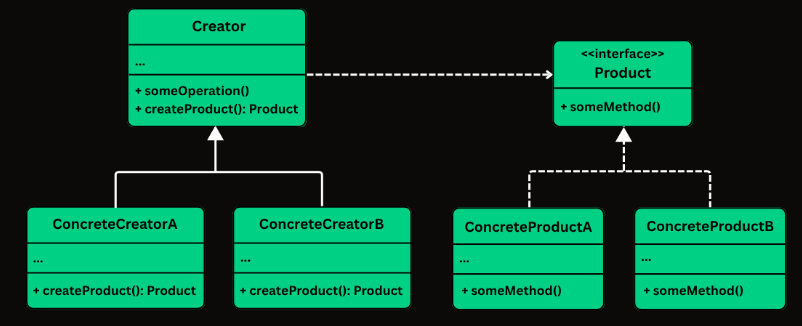
1. Product (e.g Notification): An interface or abstract class for the objects the factory method creates.
2. ConcreateProduct (e.g EmailNotification, SMSNotification): Concrete classes that implement the Product interface.
3. Creator (e.g. NotificationCreator): An abstract class that declares the factory method, which returns an object of type Product. The creator can also have other methods that use the product created by the factory method.
4. ConcreteCreator (EmailNotificationCreator, SMSNotififcationCreator): Subclasses that override the factory method to return an instance of a specific ConcreteProduct.

In [6]:
# Product Interface
from abc import ABC, abstractmethod
class Notification(ABC):
    @abstractmethod
    def send(self, message):
        pass


# Concrete Products
class EmailNotification(Notification):
    def send(self, message):
        print(f"Sending email: {message}")

class SMSNotification(Notification):
    def send(self, message):
        print(f"Sending SMS: {message}")

class PushNotification(Notification):
    def send(self, message):
        print(f"Sending push notification: {message}")

# In the middle if we want to add slack
class SlackNotification(Notification):
    def send(self, message):
        print(f"Sending Slack notification: {message}")


# Abstract Creator
# Think of this class as a template:
# 1. It doesn't know what notification it's sending but it knows how to send it.
# 2. It defers the choice of notification type to its subclass.
# So abstraact cretr=or defines the flow, not the details.
class NotificationCreator(ABC):
    @abstractmethod
    def create_notification(self):
        pass

    # Common logic using the factory method
    def send(self, message):
        notification = self.create_notification()
        notification.send(message)


# Concrete Creators
class EmailNotificationCreator(NotificationCreator):
    def create_notification(self):
        return EmailNotification()

class SMSNotificationCreator(NotificationCreator):
    def create_notification(self):
        return SMSNotification()

class PushNotificationCreator(NotificationCreator):
    def create_notification(self):
        return PushNotification()

# In the middle if we want to add slack
class SlackNotificationCreator(NotificationCreator):
    def create_notification(self):
        return SlackNotification()


# Client
def main():
    # Send Email
    creator = EmailNotificationCreator()
    creator.send("Welcome to our email platform")

    # Send SMS
    creator = SMSNotificationCreator()
    creator.send("Your OTP is 12345")

    # Send Push Notification
    creator = PushNotificationCreator()
    creator.send("You have a new followe!")

    creator = SlackNotificationCreator()
    creator.send("Standup in 10 minutes!")
    
if __name__ == "__main__":
    main()

Sending email: Welcome to our email platform
Sending SMS: Your OTP is 12345
Sending push notification: You have a new followe!
Sending Slack notification: Standup in 10 minutes!


## Problem Statement: Creating Objects Dynamically
- Imagine we're builing a software system to manage vehicles for a transportation company. The system needs to create different types of vehicles such as Car, Truck, and Bike. These vehicles have different characteristics, but they all share a few common behaviors like start() and stop().
- Now, each time we need to create a vehicle, we have to decide which class to instantitate: Car, Truck, or Bike. If our application has many places where vehicles are created, maintaining all these object creation codes in different classes becomes messy.
- The problem is: How can we create vehicles easily and cleanly without hard-coding the class names everywhere in the code?
### Scenairo:
- Imagine we're building a software system to manage vehicles for a transporation company. The system needs to create different types of vehicles such as:
    - Car
    - Truck
    - Bike
- Each of these vehicles has different characteristics, but they all share a few common behaviors:
    - start()
    - stop()
### The problem
- Each time we need to create a vehicles, we have to decide manually which class to instantiate.
    - Car
    - Truck
    - Bike
- If our application has many places where vehicles are created, maintaining all these object creation codes in different classes becomes messy.
### The challenge
- How can we create vehicles easily and cleanly without hard-coding the class names everywhere in the code?
## solving it with Traditional Approach
- Where each class creates its own objects!

In [2]:
# common interface

from abc import ABC, abstractmethod

class Vehicle(ABC):
    @abstractmethod
    def start(self):
        pass

    @abstractmethod
    def stop(self):
        pass

class Car(Vehicle):
    def start(self):
        print("Car is starting...")

    def stop(self):
        print("Car is stopping...")

class Truck(Vehicle):
    def start(self):
        print("Truck is starting...")

    def stop(self):
        print("Truck is stopping...")

class Bike(Vehicle):
    def start(self):
        print("Bike is starting...")

    def stop(self):
        print("Bike is stopping...")

if __name__ == '__main__':
    vehicle1 = Car()
    vehicle1.start()
    vehicle1.stop()

    vehicle2 = Truck()
    vehicle2.start()
    vehicle2.stop()

    vehicle3 = Bike()
    vehicle3.start()
    vehicle3.stop()

Car is starting...
Car is stopping...
Truck is starting...
Truck is stopping...
Bike is starting...
Bike is stopping...


- The main class creates each vehicle explicitly by calling the constructor of the respective vehicle class. But what if we need to add more vehicle types later, or if we need to change the way vehicles are created.

### Interviewer's follow-up Questions: Can we improve the code
- What if we need to add more vehicles types in the future?
- What if the logic of vehicle creation changes?

- The Code become harder to maintain as we add more vehicle types or changes the vehicle creation logic. For example, if we had to introduce new behavior or properties for vehicle creation, we would need to modify the creation code in many places, which could lead to potential errors.

### Ugly Code: When we realize the code needs restructuring
- Instead of creating vehicles directly, the vehicle creation process is now complext. For example, we have to choose the vehicle base on user input, configuration files, or network requests. If we don't address this early on, the object creation code quickly becomes cumbersome and ugly.

In [4]:
if __name__ == '__main__':
    vehicleType = 'Truck'
    vehicle: Vehicle
    if vehicleType == 'Truck':
        vehicle = Truck()
    elif vehicleType == 'Car':
        vehicle = Car()
    elif vehicleType == 'Bike':
        vehicle = Bike()
    else:
        raise Exception
        
    vehicle.start()
    vehicle.stop()

Truck is starting...
Truck is stopping...


- If we want to add another vehcile type, we need to modify this code again, which is error-prone

## The Savior: Factory Design Pattern
- The factory pattern will allow us to handle the object creation in a centralized manner, so that we don't need to keep repeating the logic of choosing which vehicle to create in multiple places.
- The factory design pattern is named after 'factory' because, just like a factory produces different types of products, the pattern provides a central place (the factory) to create objects of different types. Instead of directly instantiating objects, the factory method is responsible for producing the correct object, making the system more flexible and organized.

In [7]:
from abc import ABC, abstractmethod

class Vehicle(ABC):
    @abstractmethod
    def start(self):
        pass

    @abstractmethod
    def stop(self):
        pass

class Car(Vehicle):
    def start(self):
        print("Car is starting...")

    def stop(self):
        print("Car is stopping...")

class Truck(Vehicle):
    def start(self):
        print("Truck is starting...")

    def stop(self):
        print("Truck is stopping...")

class Bike(Vehicle):
    def start(self):
        print("Bike is starting...")

    def stop(self):
        print("Bike is stopping...")


class VehicleFactory:
    def getVehicle(self, vehicleType):
        if vehicleType == 'Truck':
            return Truck()
        elif vehicleType == 'Car':
            return Car()
        elif vehicleType == 'Bike':
            return Bike()
        else:
            raise Exception

if __name__ == '__main__':
    vehicle1 = VehicleFactory().getVehicle('Car')
    vehicle1.start()
    vehicle1.stop()

    vehicle2 = VehicleFactory().getVehicle('Truck')
    vehicle2.start()
    vehicle2.stop()

    vehicle3 = VehicleFactory().getVehicle('Bike')
    vehicle3.start()
    vehicle3.stop()

Car is starting...
Car is stopping...
Truck is starting...
Truck is stopping...
Bike is starting...
Bike is stopping...


### Advantages of using Factory Design Pattern
1. Centralized Object Creation
    - The VehicleFactory class handles all the logic of creating vehicles. Now, we only need to call the getVehicle() method with the desired vehicle type, and the factory will take care of the rest. This makes the code much cleaner and easier to maintain.
2. Scalability
    - If we want to add a new vehicle type, say Bus, we only need to add the Bus class and update the VehicleFactory class. No changes are needed in the rest of the application.
3. Encapsulation
    - The client code (main) no longer needs to know how to create the vehicles, The logic is abstracted away in the VehicleFactory class, which makes the system easier to manager.
  
### Real-life use cases
1. Database connections:
    - When creating a connection to differen types of databases (MYSQL, PostgreSQL, Oracle), the factory can hadle the creation of database connections based on configuration parameters without exposing the details ot the client.
2. User interface elements
    - In GUI libraries, different platforms may require different implementations of buttons, windows, and menus. A factory pattern can be used to create the appropriate UI elements for the specific platform.
3. Logging
    - Depending on the logging requirements (logging to a file,, console, or database), a factory can create the correct type of logger, allowing different components of the system to use the logget without knowing its exact implementation.
  
#### Conclusion
- The factory design pattern simplifies object creation by centralizing it in a factory, making the code cleaner, more maintainable, and easier to extend. It ensures that we can easily add new types of change the instantiation logic without touching the client code. This pattern is highly beneficial when our application needs to create a variety of objects in a fexible and scalable way.

## Managing Familites of Related Object with Ease
### 1. The Problem: Managing Different Car Brands
- Imagine we're buillding a car dealership application that needs to create cars. Each car is a different type and comes from a different manufacturer, like Honda, Toyota, or BMW. Now, let's say we need to create multiple car brands dyamically based on user input or some configuration.
- We might think, I'll create the car and move on, but as the system grows and the number of car brands increases, the code starts to get messy. We'll find ourself repeating the logic of creating each type of car in multiple places, making the code hard to maintain.
### 2. Solving the problem with the factory method
- Let's start by using the factory pattern to solve the prolem. In the Factory method, we define a method for creating objects but let the subclasses decide which type of object to instantiate.

In [2]:
from abc import ABC, abstractmethod

class Vehicle(ABC):
    @abstractmethod
    def start(self):
        pass

    @abstractmethod
    def stop(self):
        pass

class Honda(Vehicle):
    def start(self):
        print("Honda Car is starting...")

    def stop(self):
        print("Honda Car is stopping...")

class Toyota(Vehicle):
    def start(self):
        print("Toyota car is starting...")

    def stop(self):
        print("Toyota car is stopping...")

class BMW(Vehicle):
    def start(self):
        print("BMW car is starting...")

    def stop(self):
        print("BMW car is stopping...")


class VehicleFactory:
    def createVehicle(self, vehicleType):
        if vehicleType == 'Honda':
            return Honda()
        elif vehicleType == 'Toyota':
            return Toyota()
        elif vehicleType == 'BMW':
            return BMW()
        else:
            raise Exception

if __name__ == '__main__':
    vehicle1 = VehicleFactory().createVehicle('Honda')
    vehicle1.start()
    vehicle1.stop()

    vehicle2 = VehicleFactory().createVehicle('Toyota')
    vehicle2.start()
    vehicle2.stop()

    vehicle3 = VehicleFactory().createVehicle('BMW')
    vehicle3.start()
    vehicle3.stop()

Honda Car is starting...
Honda Car is stopping...
Toyota car is starting...
Toyota car is stopping...
BMW car is starting...
BMW car is stopping...


### 3. Follow up Questions: Can we imporve this
- What if we need to add more car brands later?
- Is there a better way to manage the growing number of car bradns and vaoid repeating the createVehicle logic?
- As we scale the application, the Factory methods becomes cumbersome. We have to go back to the CarFactory and modify the createVehicle method every time we want to add a new car brand. This leads to code duplication and hard-to-maintain code. Everytime a new car brand is introduced, we must modify the createVehicle method, violating the open-Closed principle

### The Abstract Factory Pattern
- To solve this, we introduce the Abstract Factory design pattern. Unlike the factory method, the Abstract Factory allows us to handle the creation of related objects (like different car brands) without specifying their concrete classes directly.
- The Abstract Factory helps us manage familites of related objects. Instead of adding new conditions to createVehicle method every time a ne car brand is introduced, we can create separate factories for each car brand that encapsulate their creation.

### Why is it called the "Abstract Factory"?
- Abstract Factory comes from the concept of abstraction. In simple terms, abstraction is the process of hiding the complex details of a system and exposing only the necessary parts.
- The 'Abstract' part refers to the fact that the client cod doesn't know abou thte specific classes of objects being created. Instead of directly interacting with the concrete classes (like Honda, Toyota, or BMV), the client only knows about the factory interfaces (like VehicleFactory), which provide a method for creating objects without exposing the actual classes behind them.

### Why is thie helpful?
- Flexibility
    - We can add nee products (car brands) by simply adding new factories. The client code doen't need to modified.
- Maintainability
    - Changes to the creation process (like how a specific car is built) only need to happen inside the concrete factory, leaving the client code untouched.
- Decoupling:
    - The client doen't need to know the specifics of the objects it uses. It simply relies on the abstract factory, making the system more modular and easier to change.

### solving the problem using Abstract Factory
- 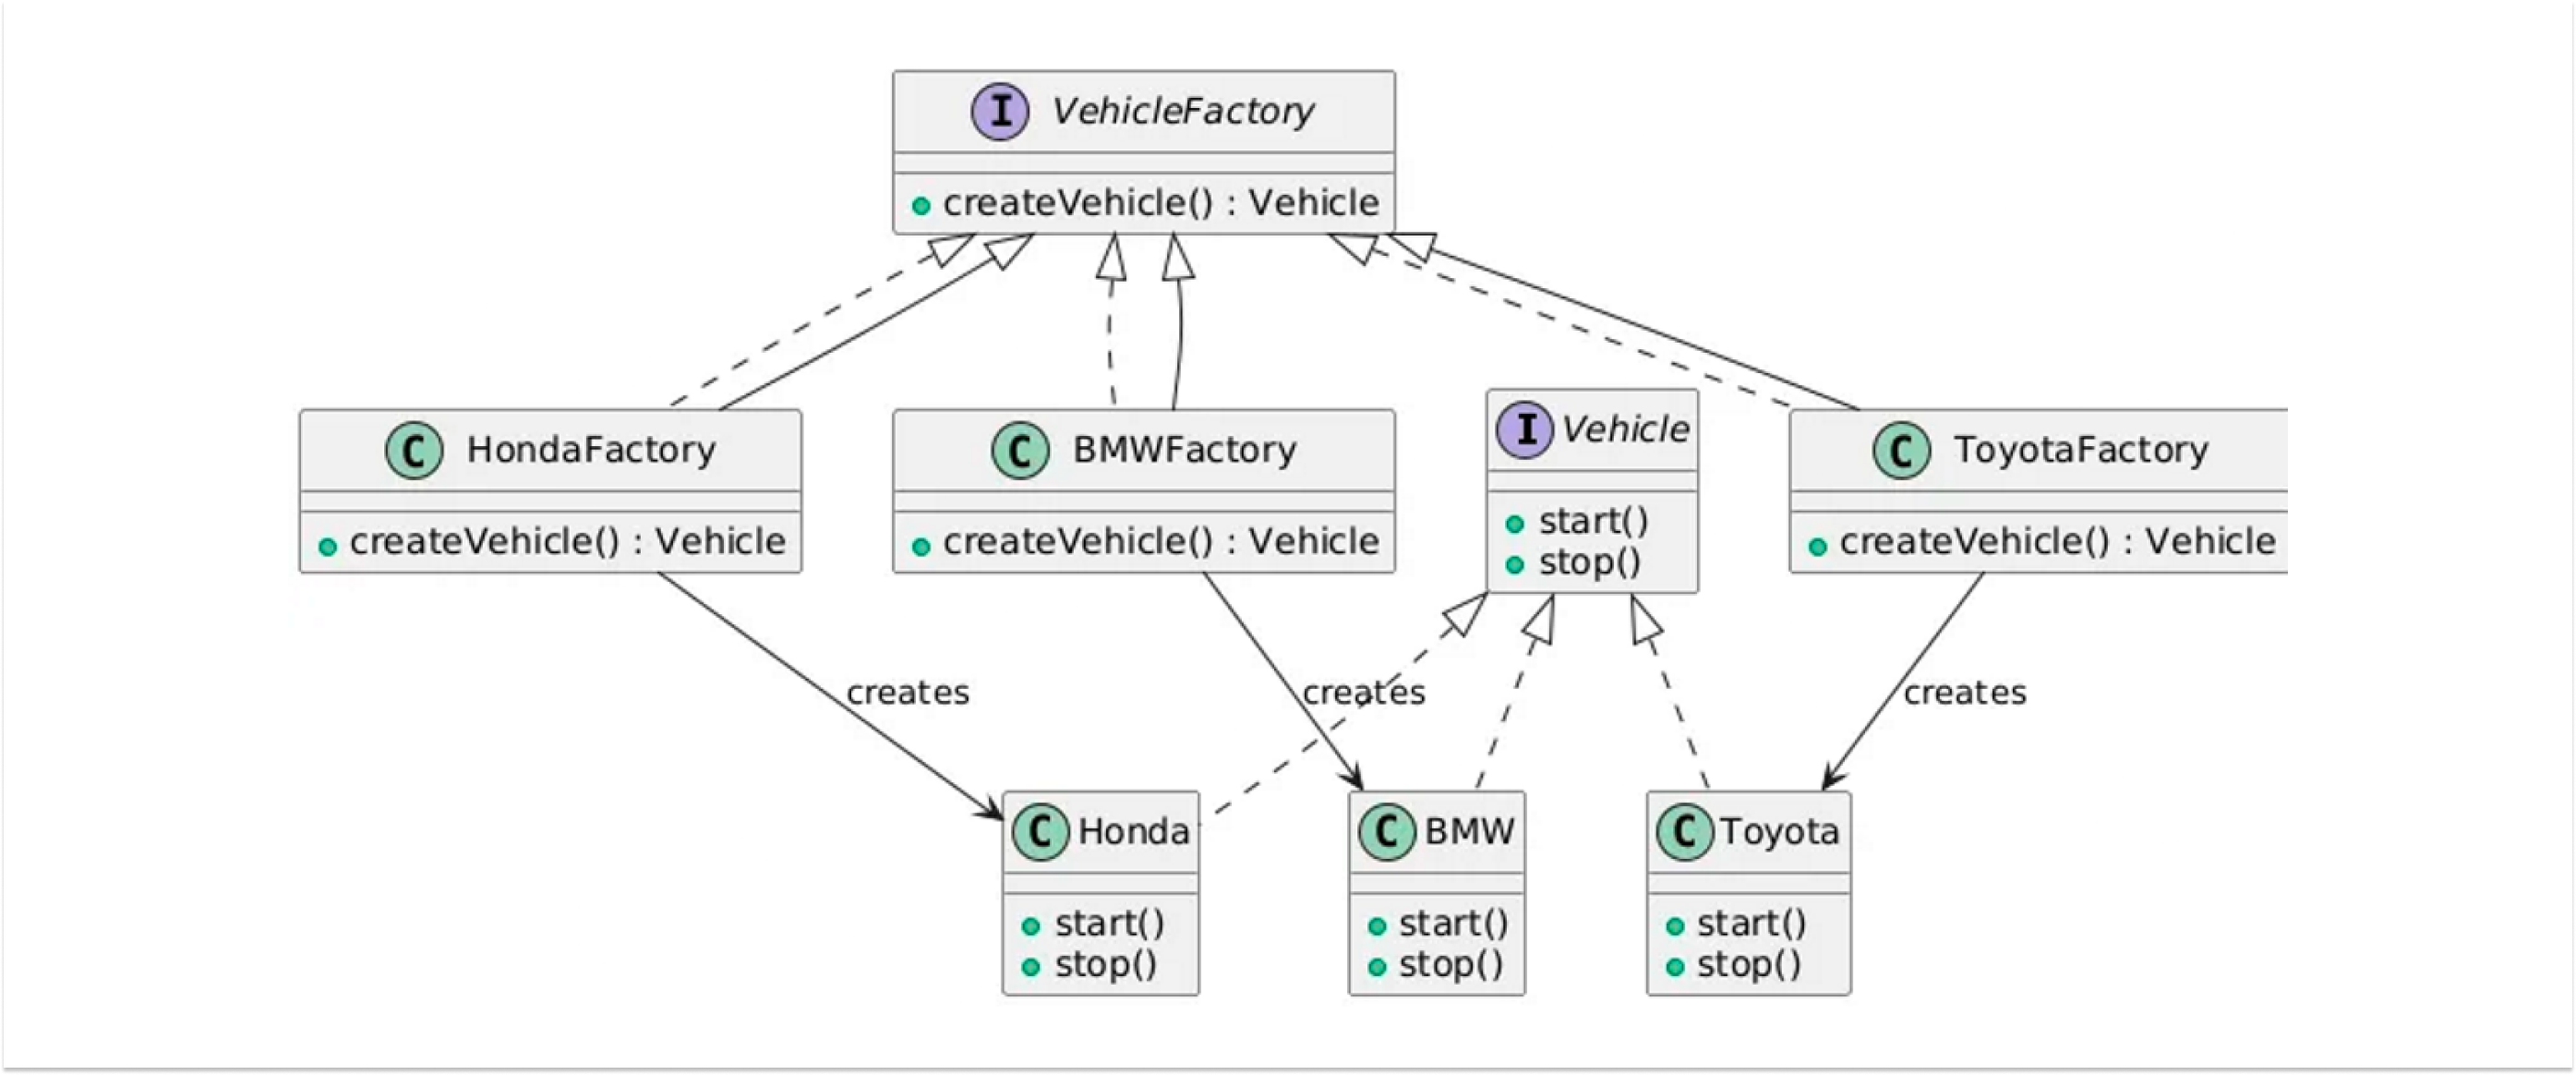

In [4]:
from abc import ABC, abstractmethod

class Vehicle(ABC):
    @abstractmethod
    def start(self):
        pass

    @abstractmethod
    def stop(self):
        pass

class Honda(Vehicle):
    def start(self):
        print("Honda Car is starting...")

    def stop(self):
        print("Honda Car is stopping...")

class Toyota(Vehicle):
    def start(self):
        print("Toyota car is starting...")

    def stop(self):
        print("Toyota car is stopping...")

class BMW(Vehicle):
    def start(self):
        print("BMW car is starting...")

    def stop(self):
        print("BMW car is stopping...")


class VehicleFactory(ABC):
    @abstractmethod
    def createVehicle(self):
        pass

class HondaFactory(VehicleFactory):
    def createVehicle(self):
        return Honda()

class ToyotaFactory(VehicleFactory):
    def createVehicle(self):
        return Toyota()

class BMWFactory(VehicleFactory):
    def createVehicle(self):
        return BMW()

if __name__ == '__main__':
    hondaFactory = HondaFactory()
    honda = hondaFactory.createVehicle()
    honda.start()
    honda.stop()

    toyotaFactory = ToyotaFactory()
    toyota = toyotaFactory.createVehicle()
    toyota.start()
    toyota.stop()

    BMWFactory = BMWFactory()
    bmw = BMWFactory.createVehicle()
    bmw.start()
    bmw.stop()

Honda Car is starting...
Honda Car is stopping...
Toyota car is starting...
Toyota car is stopping...
BMW car is starting...
BMW car is stopping...


### Real-life use cases
- Cross Platform UI Libraries
    - If we're developing a cross-platform application, we can use an abstract Factory to create platform specific UI elements (buttons, windows, textboxes) for windows, Mac, or Android, ensuring consistency across platforms.
- Database Connections:
    - In a multi-database system, we can use an abstract Factory to create database connections for different databases like MySQL, PostgreSQL, or MongoDB.
- Game Development
    - In a game, we might have different familities of objects like characters, weapons, and environments. The Abstract Factory ensures that all elements in a particular family (all weapons ina medieval game) are consistent.
 
### Factory vs Abstract Factory
1. Purpose
    - Factory: Creates one type of object
    - Abstract: Creates familites of related objects.
2. Scope
    - Factory: Focusse son creating a single product
    - Abstract: Creates multiple related products
3. Abstraction level
    - Factory: Deals with one product type at a time
    - Abstract: Deals with groups of related products
4. Example:
    - Factory: A carFactory creates one type of car.
    - Abstract: A vehileFactory creates cars, trucks, and bikes of the same brand.
5. Flexibility
    - Factory: Adding new products requires changing the factory
    - Abstract: Adding new families doen't affect existing code.
6. Use Cases:
    - Factory: When we need to create a single object (one car model)
    - Abstract: When we need to create related objects (different vehicles from the same brand)
- Factory method, which works well for single products, the Abstract Factory is designed to handle families of related products with ease, making it an essential pattern in complex systems.

# 3. Builder Design Patterns
- Patterns that lets us construct complext objects step-by-step, separating the consturction logic from the final representation.
- It's useful in:
    - An object requires many optional fields, and not all of them are needed everytime.
    - We want to avoid telescoping constructors or large constructors with multiple parameters.
    - The object construction process involves multiple steps that need to happen in a particular order.
- When building such objects, developers often reply on constructors with many parameters or expose stters for every field. As the number of fields grows, this approach becomes harder to manager, error-prone, and violtes single resposbility principle - mixining constrcution logic with business logic.
- The Builder Pattern solves this by introducing a separate builder class that handles the object creation process. The client uses this builder to construct the object step-by-step, while keeping the final object immutable, consistent, and easy to create. 

### Problem: Building Complex HtppRequest Objects
- We're building a system that needs to configure and create HTTP requests. Each HttpRequest can contain a mix of required and optional fields depending on the use case.
- Typical HTTP request include:
    - URL (required)
    - HTTP Method (GET, POST, PUT - default to GET)
    - Headers (Optional, multiple key-value pairs)
    - Query Parameters (Optional, multiple key-value pairs)
    - Request Body (Optional, typically for POST/PUT)
    - Timeout (Optional, default to 30 seconds)
      
#### Native Approach: Telescoping Constructors:
- To use constructor overloading often referred to as the telescoping constructor anti-pattern. 

In [8]:
class HttpRequestTelescoping:
    def __init__(self, url, method="GET", headers=None, query_params=None, body=None, timeout=30000):
        self.url = url
        self.method = method
        self.headers = headers if headers is not None else {}
        self.query_params = query_params if query_params is not None else {}
        self.body = body
        self.timeout = timeout

        print(f"HttpRequest Created: URL={url},"
            f"Method={method},"
            f"Headers={len(self.headers)},"
            f"Params={len(self.query_params)},"
            f"Bidy={body is not None},"
            f"Timeout={timeout}")

# Client Code
if __name__ == "__main__":
    req1 = HttpRequestTelescoping("https://api.example.com/data")
    req2 = HttpRequestTelescoping(
        "https://api.example.com/submit",
        "POST",
        None,
        None,
        '{"key":"value"}'
    )

    req3 = HttpRequestTelescoping(
        "https://api.example.com/config",
        "PUT",
        {"X-API-Key": "secret"},
        None,
        "config_data",
        5000
    )
        

HttpRequest Created: URL=https://api.example.com/data,Method=GET,Headers=0,Params=0,Bidy=False,Timeout=30000
HttpRequest Created: URL=https://api.example.com/submit,Method=POST,Headers=0,Params=0,Bidy=True,Timeout=30000
HttpRequest Created: URL=https://api.example.com/config,Method=PUT,Headers=1,Params=0,Bidy=True,Timeout=5000


#### Builder Pattern
- The Builder pattern separates the construction of a complex object from its representation.
- In the builder pattern:
    - The construction logic is encapsulated in a builder.
    - The final object (The product) is created by calling a build() method.
    - The object itself has a private or package-private constructor, forcing construction through the builder.
- 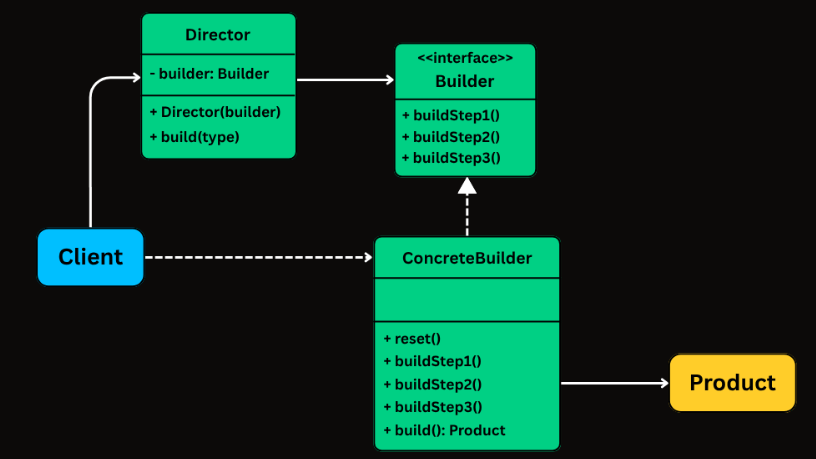

In [20]:
# Product Class
# Its constructor will be private, forcing clients to construct it via the builder
class HttpRequest:
    def __init__(self, builder):
        self.url = builder.url
        self.method = builder.method
        self.headers = builder.headers
        self.query_params = builder.query_params
        self.body = builder.body
        self.timeout = builder.timeout

    def __str__(self):
        return (f"HttpRequest(url={self.url}, method={self.method}, headers={self.headers}, "
                f"query_params={self.query_params}, body={self.body}, timeout={self.timeout})")

    class Builder:
        def __init__(self, url):
            self.url = url
            self.method = "GET"
            self.headers = {}
            self.query_params = {}
            self.body = None
            self.timeout = 30000

        def add_method(self, method):
            self.method = method
            return self

        def add_header(self, key, value):
            self.headers[key] = value
            return self

        def add_query_param(self, key, value):
            self.query_params[key] = value
            return self

        def add_body(self, body):
            self.body = body
            return self

        def add_timeout(self, timeout):
            self.timeout = timeout
            return self

        def build(self):
            return HtttpRequest(self)

            
# Using the Builder from Client Code
if __name__ == "__main__":
    request1 = HttpRequest.Builder("https://api.example.com/data").build()

    request2 = HttpRequest.Builder("https://api.example.com/submit")\
        .add_method("POST") \
        .add_body('{"key":"value"}') \
        .add_timeout(15000) \
        .build()

    request3 = HttpRequest.Builder("https://api.example.com/config") \
        .add_method("PUT") \
        .add_header("X-API-Key", "secret") \
        .add_query_param("env", "prod") \
        .add_body("config_payload") \
        .add_timeout(5000) \
        .build()

    print(request1)
    print(request2)
    print(request3)

HttpRequest(url=https://api.example.com/data, method=GET, headers={}, query_params={}, body=None, timeout=30000)
HttpRequest(url=https://api.example.com/submit, method=POST, headers={}, query_params={}, body={"key":"value"}, timeout=15000)
HttpRequest(url=https://api.example.com/config, method=PUT, headers={'X-API-Key': 'secret'}, query_params={'env': 'prod'}, body=config_payload, timeout=5000)
